In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
names = ["Denver", "Miami", "Minneapolis", "New York", "Phoenix"]
colnames = ["W0000_0600","W0601_1200","W1201_1800","W1801_2359","WS1","WS2","WS3","WS4"]
countries = [ 
 pd.read_csv('Denver.csv')
,pd.read_csv('Miami.csv')
,pd.read_csv('Minneapolis.csv')
,pd.read_csv('NewYork.csv')
,pd.read_csv('Phoenix.csv')
]

In [5]:
countries[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2192 entries, 0 to 2191
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2192 non-null   object
 1   W0000_0600  2192 non-null   object
 2   W0601_1200  2192 non-null   object
 3   W1201_1800  2192 non-null   object
 4   W1801_2359  2192 non-null   object
 5   WS1         506 non-null    object
 6   WS2         342 non-null    object
 7   WS3         344 non-null    object
 8   WS4         408 non-null    object
 9   A0000_0600  2192 non-null   int64 
 10  A0601_1200  2192 non-null   int64 
 11  A1201_1800  2192 non-null   int64 
 12  A1801_2359  2192 non-null   int64 
 13  A_Total     2192 non-null   int64 
 14  Accident    2192 non-null   bool  
dtypes: bool(1), int64(5), object(9)
memory usage: 242.0+ KB


In [6]:
for i in range(len(names)): # get statistic for all the 5 countries
	print("\nCountry :", names[i])
	print(countries[i].describe(include="all"))


Country : Denver
              Date W0000_0600 W0601_1200 W1201_1800 W1801_2359    WS1    WS2  \
count         2192       2192       2192       2192       2192    506    342   
unique        2192          7          6          6          6      5      4   
top     2017-01-10      Clear      Clear      Clear      Clear  Light  Light   
freq             1       1686       1850       1848       1784    394    236   
mean           NaN        NaN        NaN        NaN        NaN    NaN    NaN   
std            NaN        NaN        NaN        NaN        NaN    NaN    NaN   
min            NaN        NaN        NaN        NaN        NaN    NaN    NaN   
25%            NaN        NaN        NaN        NaN        NaN    NaN    NaN   
50%            NaN        NaN        NaN        NaN        NaN    NaN    NaN   
75%            NaN        NaN        NaN        NaN        NaN    NaN    NaN   
max            NaN        NaN        NaN        NaN        NaN    NaN    NaN   

          WS3    WS4 

Types of analysis to do (Add if you think it is relevant):
   1. Correlation Matrix / Heatmap [ sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f") ]
   2. No. of Weathers that occur from 2016 to 2021
   3. Total no. of accidents that happened for each weathers 
      [ legnd_data = pkmndata[pkmndata["Legendary"] == True] , print("Number of Legendary Pokemons :", len(legnd_data)) ]
   4. Uni-Variate Linear Regression (Predictor = precipitation)
   5. Goodness of Fit of the Model
   6. Regression with random train-test split
   7. Simple Decision tree (Response = Accident[T/F], Predictor = precipitation)
   8. Classification tree with Random Train-Test Split 
   9. Prediction of Accident 

In [7]:
weather = pd.DataFrame(countries[0]["W0000_0600"])
accident = pd.DataFrame(countries[0]['Accident'])
print(weather)

     W0000_0600
0         Clear
1         Clear
2         Clear
3         Clear
4         Clear
...         ...
2187      Clear
2188      Clear
2189      Clear
2190      Clear
2191      Clear

[2192 rows x 1 columns]


Number of Weathers that occur : 7
Clear            1686
Rain              270
Snow              170
Fog                51
Storm               8
Precipitation       5
Cold                2
Name: W0000_0600, dtype: int64


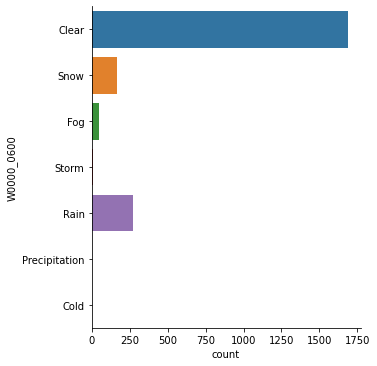

In [8]:
# Generations in the Dataset
print("Number of Weathers that occur :", len(countries[0]["W0000_0600"].unique()))

# Pokemons in each Generation
print(countries[0]["W0000_0600"].value_counts())
sb.catplot(y = "W0000_0600", data = countries[0], kind = "count")

In [9]:
accdnt = pd.DataFrame(countries[0]['Accident'])
weather = pd.DataFrame(countries[0]["W0000_0600"])

In [10]:
# Train Set : 600 samples
weather_train = pd.DataFrame(weather[:600])
accdnt_train = pd.DataFrame(accdnt[:600])

# Test Set : 200 samples
weather_test = pd.DataFrame(weather[-200:])
accdnt_test = pd.DataFrame(accdnt[-200:])

# Check the sample sizes
print("Train Set :", accdnt_train.shape, weather_train.shape)
print("Test Set  :", accdnt_test.shape, weather_test.shape)

Train Set : (600, 1) (600, 1)
Test Set  : (200, 1) (200, 1)


In [47]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 4)

# Train the Decision Tree Classifier model
odata_train = pd.get_dummies(weather_train)
odata_test = pd.get_dummies(weather_test)
dectree.fit(odata_train, accdnt_train)


<bound method NDFrame.head of      W0000_0600_Clear  W0000_0600_Cold  W0000_0600_Fog  \
0                   1                0               0   
1                   1                0               0   
2                   1                0               0   
3                   1                0               0   
4                   1                0               0   
..                ...              ...             ...   
595                 1                0               0   
596                 1                0               0   
597                 0                0               0   
598                 1                0               0   
599                 1                0               0   

     W0000_0600_Precipitation  W0000_0600_Rain  W0000_0600_Snow  \
0                           0                0                0   
1                           0                0                0   
2                           0                0                0   
3    

[Text(478.2857142857143, 587.0880000000001, 'W0000_0600_Snow <= 0.5\ngini = 0.499\nsamples = 600\nvalue = [310, 290]\nclass = No Accident'),
 Text(382.62857142857143, 456.624, 'W0000_0600_Storm <= 0.5\ngini = 0.5\nsamples = 567\nvalue = [285, 282]\nclass = No Accident'),
 Text(286.9714285714286, 326.1600000000001, 'W0000_0600_Clear <= 0.5\ngini = 0.5\nsamples = 565\nvalue = [283, 282]\nclass = No Accident'),
 Text(191.31428571428572, 195.69600000000003, 'W0000_0600_Precipitation <= 0.5\ngini = 0.492\nsamples = 112\nvalue = [49, 63]\nclass = Accident'),
 Text(95.65714285714286, 65.23200000000008, 'gini = 0.491\nsamples = 111\nvalue = [48, 63]\nclass = Accident'),
 Text(286.9714285714286, 65.23200000000008, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No Accident'),
 Text(382.62857142857143, 195.69600000000003, 'gini = 0.499\nsamples = 453\nvalue = [234, 219]\nclass = No Accident'),
 Text(478.2857142857143, 326.1600000000001, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = No Acci

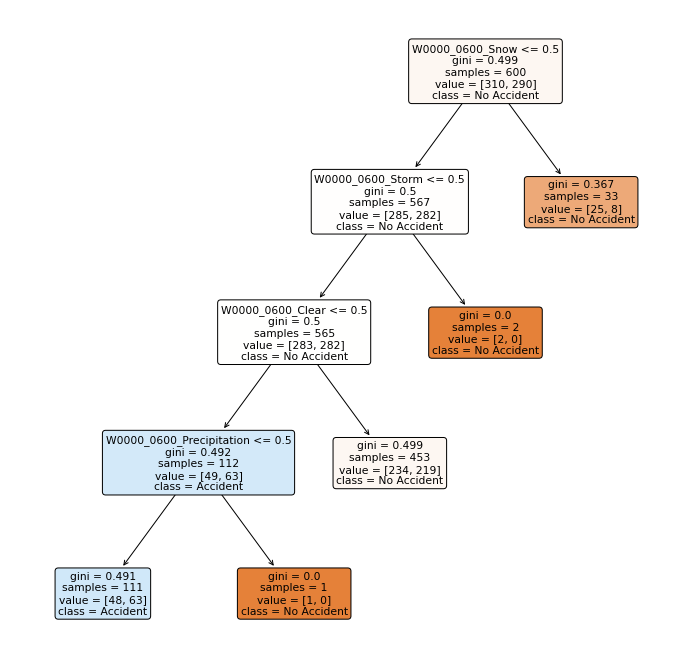

In [48]:
feature_col = ['W0000_0600_Clear', 'W0000_0600_Cold', 'W0000_0600_Fog', 'W0000_0600_Precipitation', 'W0000_0600_Rain', 'W0000_0600_Snow', 'W0000_0600_Storm']
f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, feature_names= feature_col, class_names=['No Accident', 'Accident'])

Classification Accuracy 	: 0.5416666666666666


<AxesSubplot:>

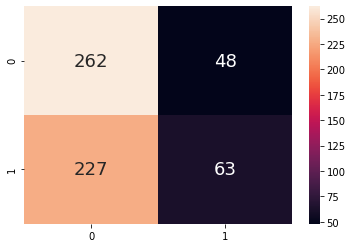

In [55]:
# Predict Legendary corresponding to Total Train
accdnt_train_pred = dectree.predict(odata_train)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(odata_train, accdnt_train))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(accdnt_train, accdnt_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

,Accident
count,600
unique,2
top,False
freq,310
